## 1. Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data in `hotel_bookings.csv` as a DataFrame called `hotel_booking`
hotel_booking = pd.read_csv("hotel_bookings.csv")

In [3]:
# Look at the info of the DataFrame
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Look at the first 5 rows of the DataFrame
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
# Look at the columns of the DataFrame
hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## 2. Lets do Data cleaning !

### Removing Duplicated data

In [6]:
# There are 31,994 rows of duplicated values.
hotel_booking[hotel_booking.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,7/7/2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,7/7/2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,7/1/2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,7/8/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,9/3/2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


In [7]:
# drop duplicated values 
hotel_booking = hotel_booking.drop_duplicates()
hotel_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


### Replacing Missing data

In [8]:
# Look at the info summary
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [9]:
# Check for missing data by columns in children using the isna method
hotel_booking[hotel_booking["children"].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,8/1/2015
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,8/4/2015
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,8/4/2015
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,8/9/2015


In [10]:
# replace a missing data with mode
hotel_booking["children"].fillna(hotel_booking["children"].mode()[0],inplace=True)

In [11]:
# Check for missing data by columns in country using the isna method
hotel_booking[hotel_booking["country"].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,7/15/2015
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2/15/2016
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,7/20/2016
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,7/22/2016
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,10/13/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,2016,November,47,17,4,11,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,11/17/2016
61244,City Hotel,1,0,2016,December,50,6,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,12/6/2016
65907,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,4/10/2017
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,11/26/2015


In [12]:
# replace a missing data with mode
hotel_booking["country"].fillna(hotel_booking["country"].mode()[0],inplace=True)

In [13]:
# replace a missing data in columns "agent" and "company" with 0
hotel_booking["agent"] = hotel_booking["agent"].fillna(0)
hotel_booking["company"] = hotel_booking["company"].fillna(0)

### Removing invalid data

In [14]:
## Adults, children, and babies cannot be zero at the same time because a booking cannot be possible if these three attributes are 0.
hotel_booking[hotel_booking["adults"] ==0][["adults", "children", "babies"]].value_counts()

adults  children  babies
0       2.0       0         201
        0.0       0         166
        3.0       0          11
        1.0       0           4
        2.0       1           3
Name: count, dtype: int64

In [15]:
filter = (hotel_booking['adults']==0) & (hotel_booking['children']==0) & (hotel_booking['babies']==0)
hotel_booking[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [16]:
# Drop these values using a bitwise method
hotel_booking = hotel_booking[~filter]

In [17]:
# After dropping the values, the number of rows must be 87,230.
hotel_booking.shape

(87230, 32)

### Converting data type

In [18]:
hotel_booking.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [19]:
pd.options.mode.chained_assignment = None

In [20]:
# convert data type of column "children", "agent" and "company" from "float64" to "int64"
hotel_booking["children"] = hotel_booking["children"].astype("int64")
hotel_booking["agent"] = hotel_booking["agent"].astype("int64")
hotel_booking["company"] = hotel_booking["company"].astype("int64")

In [21]:
# Convert the data type of the 'reservation_status_date' column to 'datetime'. 
hotel_booking["reservation_status_date"] = pd.to_datetime(hotel_booking["reservation_status_date"])

### Create a new column for the combination of arrival year, month, and day.

In [22]:
hotel_booking["arrival_date_year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: arrival_date_year, dtype: int64

In [23]:
hotel_booking["arrival_date_month"].head()

0    July
1    July
2    July
3    July
4    July
Name: arrival_date_month, dtype: object

In [24]:
hotel_booking["arrival_date_day_of_month"].head()

0    1
1    1
2    1
3    1
4    1
Name: arrival_date_day_of_month, dtype: int64

In [25]:
'''
we need to use .astype(str) to convert int values to string , 
otherwise we are unable to perform this string concatenation operation ..
'''
combination = hotel_booking["arrival_date_year"].astype(str) + "-" + hotel_booking["arrival_date_month"].astype(str) + "-" + hotel_booking["arrival_date_day_of_month"].astype(str)
hotel_booking["arrival_date"] = combination

In [26]:
hotel_booking["arrival_date"] = pd.to_datetime(hotel_booking["arrival_date"], yearfirst=True)

In [27]:
# re-check the result again
hotel_booking[["arrival_date", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]] 

,arrival_date,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015-07-01,2015,July,1
1,2015-07-01,2015,July,1
2,2015-07-01,2015,July,1
3,2015-07-01,2015,July,1
4,2015-07-01,2015,July,1
...,...,...,...,...
119385,2017-08-30,2017,August,30
119386,2017-08-31,2017,August,31
119387,2017-08-31,2017,August,31
119388,2017-08-31,2017,August,31


## Handling outliers

In [28]:
# Check for outliers in `hotel_booking` using the `describe` method, then look at the histograms of the suspicious columns
hotel_booking.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,87230.0,0.275238,0.0,0.0,0.0,1.0,1.0,0.446637
lead_time,87230.0,79.971019,0.0,11.0,49.0,125.0,737.0,86.058683
arrival_date_year,87230.0,2016.210352,2015.0,2016.0,2016.0,2017.0,2017.0,0.686064
arrival_date_week_number,87230.0,26.835091,1.0,16.0,27.0,37.0,53.0,13.669216
arrival_date_day_of_month,87230.0,15.815832,1.0,8.0,16.0,23.0,31.0,8.835545
stays_in_weekend_nights,87230.0,1.004609,0.0,0.0,1.0,2.0,19.0,1.027408
stays_in_week_nights,87230.0,2.623925,0.0,1.0,2.0,4.0,50.0,2.03983
adults,87230.0,1.879365,0.0,2.0,2.0,2.0,55.0,0.621724
children,87230.0,0.138897,0.0,0.0,0.0,0.0,10.0,0.456265
babies,87230.0,0.010845,0.0,0.0,0.0,0.0,10.0,0.113704


<Axes: xlabel='lead_time', ylabel='Count'>

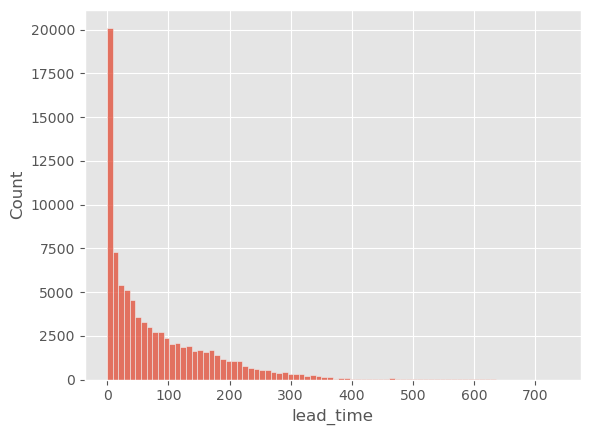

In [29]:
plt.style.use("ggplot")
sns.histplot(data=hotel_booking["lead_time"], bins=80)

In [30]:
# Explore the outliers in "lead_time"
hotel_booking["lead_time"].quantile(0.99)
hotel_booking[hotel_booking["lead_time"] > hotel_booking["lead_time"].quantile(0.99)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,...,40,0,0,Contract,55.68,0,0,Canceled,2015-05-19,2015-07-03
82,Resort Hotel,0,364,2015,July,27,3,3,7,2,...,40,0,0,Contract,55.68,0,0,Check-Out,2015-07-13,2015-07-03
225,Resort Hotel,0,394,2015,July,28,8,2,5,2,...,40,0,0,Contract,89.68,0,0,Check-Out,2015-07-15,2015-07-08
245,Resort Hotel,0,366,2015,July,28,9,2,5,2,...,40,0,0,Contract,134.73,0,0,Check-Out,2015-07-16,2015-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118952,City Hotel,0,457,2017,August,34,25,0,2,2,...,6,0,0,Transient-Party,122.40,0,1,Check-Out,2017-08-27,2017-08-25
119053,City Hotel,0,518,2017,August,34,26,2,1,2,...,229,0,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29,2017-08-26
119057,City Hotel,0,518,2017,August,34,26,2,1,2,...,229,0,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29,2017-08-26
119102,City Hotel,0,518,2017,August,34,26,2,1,1,...,229,0,0,Transient-Party,0.00,0,0,Check-Out,2017-08-29,2017-08-26


<Axes: >

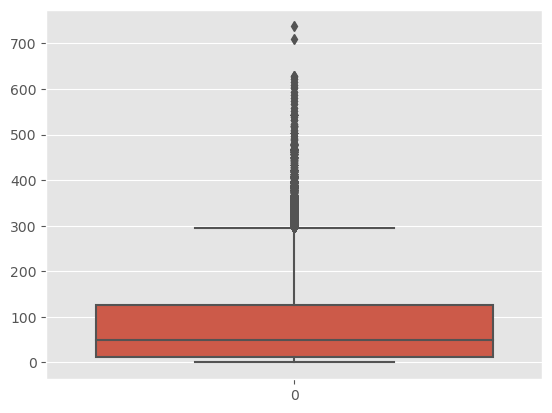

In [31]:
sns.boxplot(data=hotel_booking["lead_time"])

In [32]:
# Since there is no more information, we will keep it.
hotel_booking.nlargest(2,"lead_time")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,...,0,0,0,Transient,68.0,0,0,Check-Out,2016-03-24,2016-02-25


<Axes: >

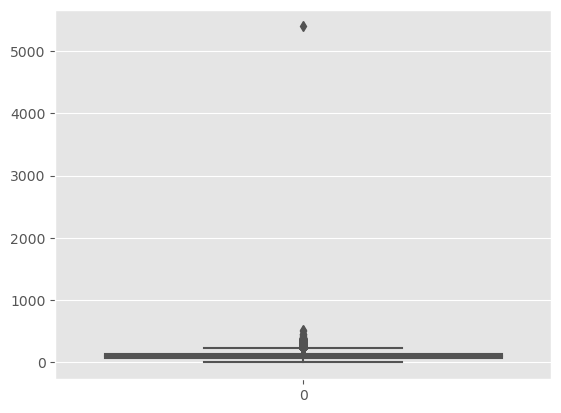

In [33]:
# Explore the outliers in "adr"
sns.boxplot(data=hotel_booking["adr"])

In [34]:
hotel_booking["adr"].quantile(0.99)

261.6207000000011

In [35]:
hotel_booking.nlargest(10,"adr")["adr"]
# The "adr" column appears to have an outlier, as the 99th percentile value is 261, 
# but the max value is 5400.

48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
13391      437.00
39155      426.25
39568      402.00
39118      397.38
13323      392.00
Name: adr, dtype: float64

In [36]:
# drop the value from data set
hotel_booking.drop(index=48515,inplace=True)

In [37]:
hotel_booking[hotel_booking["adr"] < 0]
# In general, ADR (Average Daily Rate) cannot have a value less than 0

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,273,0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05


In [38]:
# drop the value from data set
hotel_booking.drop(index=14969,inplace=True)

## Exploratory Data Analysis

#### Before beginning the exploratory data analysis (EDA), let's split the data for canceled and were not canceled.

In [39]:
hotel_no_canceled = hotel_booking[hotel_booking["is_canceled"] ==0]
hotel_canceled = hotel_booking[hotel_booking["is_canceled"] ==1]

In [40]:
# Let's review hotel_no_canceled
hotel_no_canceled["hotel"].value_counts()

hotel
City Hotel      37239
Resort Hotel    25981
Name: count, dtype: int64

In [41]:
# Let's review hotel_canceled
hotel_canceled["hotel"].value_counts()

hotel
City Hotel      16034
Resort Hotel     7974
Name: count, dtype: int64

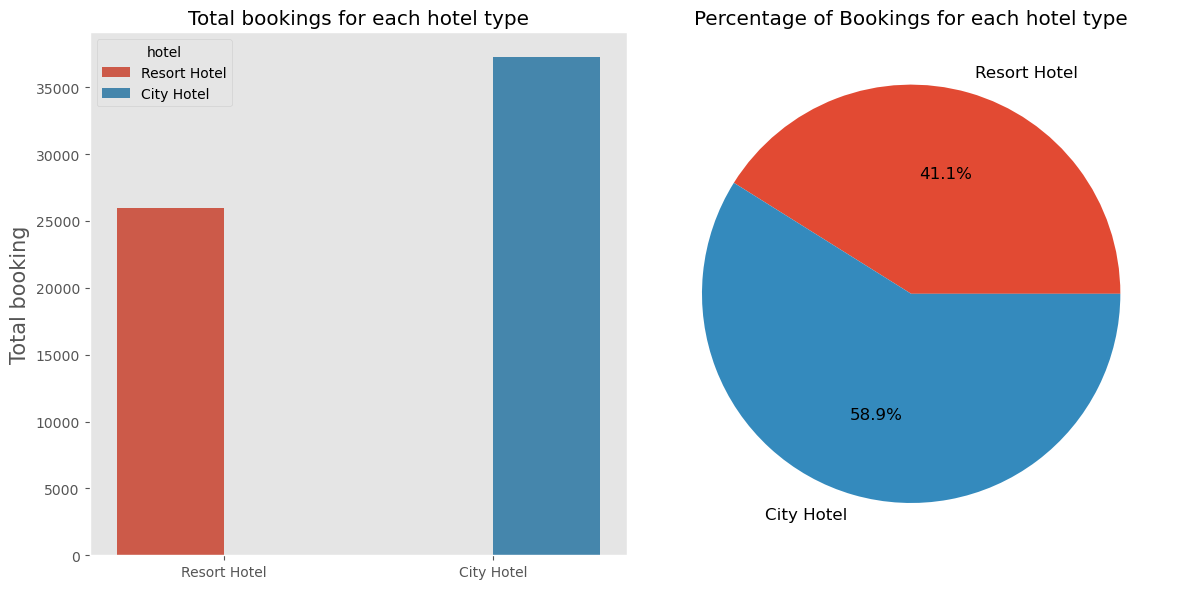

In [42]:
# 1. What is more popular:a resort hotel or a city hotel?"
plt.style.use("ggplot")
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Bar Chart
sns.countplot(data=hotel_no_canceled, x ="hotel", ax=ax1,hue="hotel")
ax1.set_ylabel("Total booking",size=15)
ax1.set_xlabel(None)
ax1.set_title("Total bookings for each hotel type")
ax1.grid(False)

# Pie Chart
hotel_no_canceled["hotel"].value_counts(sort=False).plot(
    kind="pie",
    ax=ax2, 
    autopct = '%1.1f%%',
    fontsize=12)
ax2.set_ylabel(None)
ax2.set_title("Percentage of Bookings for each hotel type")


plt.tight_layout()

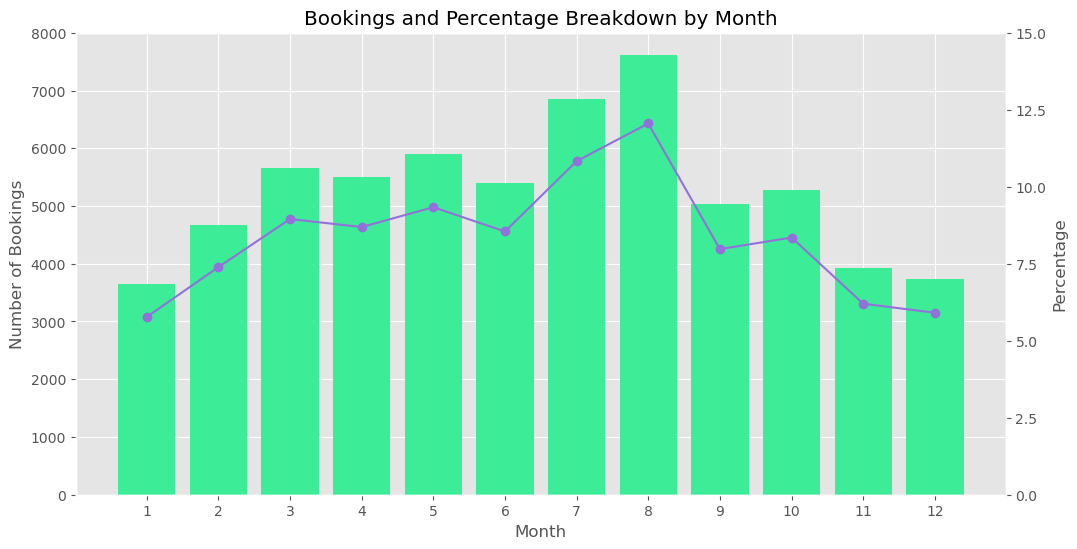

In [43]:
# Let's review bookings and the percentage breakdown by month

# Data Preparation
x1 = hotel_no_canceled["arrival_date"].dt.month.value_counts().sort_index().index
y1 = hotel_no_canceled["arrival_date"].dt.month.value_counts().sort_index().values
y2 = (hotel_no_canceled["arrival_date"].dt.month.value_counts(normalize=True) * 100).sort_index()

# bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(x1, y1,color="#3CEC97")
ax1.set_title("Bookings and Percentage Breakdown by Month")

# Customize the plot details
ax1.set_xticks(np.arange(1,13))
ax1.set_ylabel("Number of Bookings")
ax1.set_xlabel("Month")

# line chart
ax2 = ax1.twinx()
ax2.plot(x1, y2,color="#9370DB",marker="o")

# Customize the plot details
ax2.set_ylabel("Percentage")
ax2.grid(False)
ax2.set_yticks([0,2.5,5,7.5,10,12.5,15]);

'''
July and August is the high season
''';

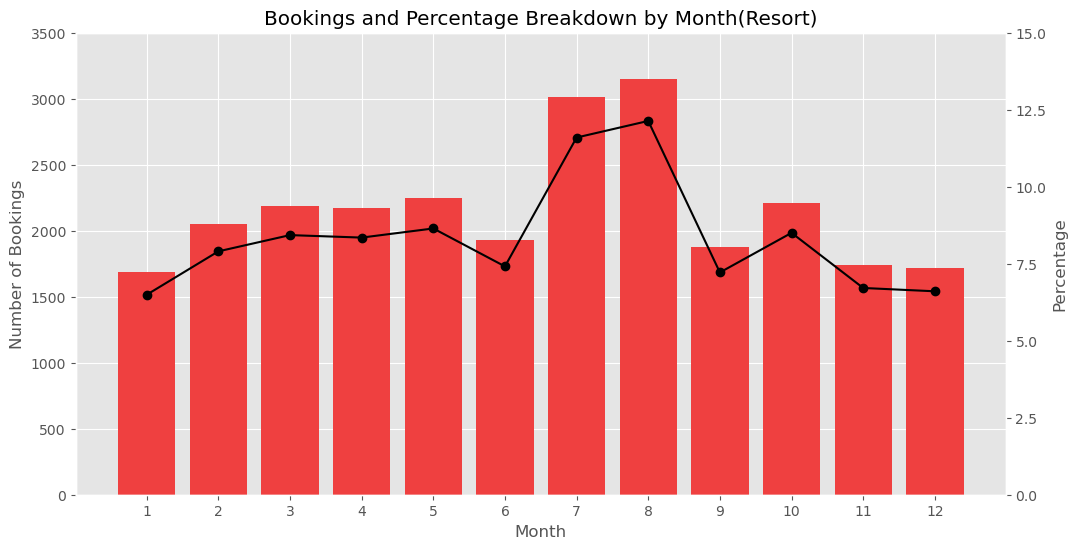

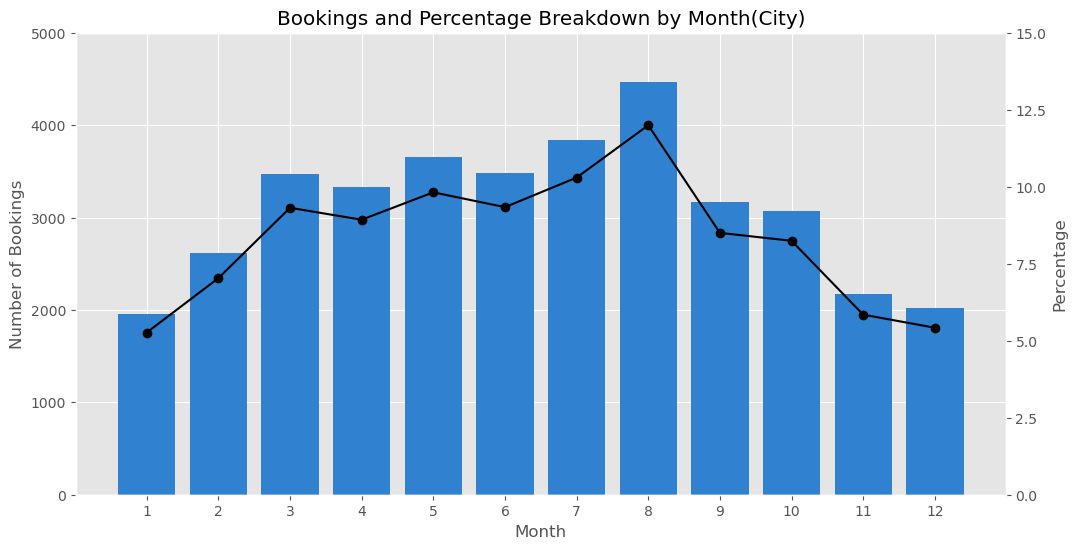

In [44]:
# Let's review bookings and the percentage breakdown by month for Resort Hotel

# Data Preparation
df = hotel_no_canceled[hotel_no_canceled["hotel"] == "Resort Hotel"]
resort_x1 = df["arrival_date"].dt.month.value_counts().sort_index().index
resort_y1 = df["arrival_date"].dt.month.value_counts().sort_index().values
resort_y2 = (df["arrival_date"].dt.month.value_counts(normalize=True) * 100).sort_index()

# bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(resort_x1, resort_y1,color="#EF4040")

# Customize the plot details
ax1.set_title("Bookings and Percentage Breakdown by Month(Resort)")
ax1.set_xticks(np.arange(1,13))
ax1.set_ylabel("Number of Bookings")
ax1.set_xlabel("Month")
ax1.set_ylim(0,3500)

# line chart
ax2 = ax1.twinx()
ax2.plot(resort_x1, resort_y2,color="#000000",marker="o")

# Customize the plot details
ax2.set_ylabel("Percentage")
ax2.grid(False)
ax2.set_yticks([0,2.5,5,7.5,10,12.5,15]);

# Let's review bookings and the percentage breakdown by month for City Hotel
# Data Preparation
df = hotel_no_canceled[hotel_no_canceled["hotel"] == "City Hotel"]
resort_x1 = df["arrival_date"].dt.month.value_counts().sort_index().index
resort_y1 = df["arrival_date"].dt.month.value_counts().sort_index().values
resort_y2 = (df["arrival_date"].dt.month.value_counts(normalize=True) * 100).sort_index()

# bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(resort_x1, resort_y1,color="#3081D0")

# Customize the plot details
ax1.set_title("Bookings and Percentage Breakdown by Month(City)")
ax1.set_xticks(np.arange(1,13))
ax1.set_ylabel("Number of Bookings")
ax1.set_xlabel("Month")
ax1.set_ylim(0,5000)

# line chart
ax2 = ax1.twinx()
ax2.plot(resort_x1, resort_y2,color="#000000",marker="o")

# Customize the plot details
ax2.set_ylabel("Percentage")
ax2.grid(False)
ax2.set_yticks([0,2.5,5,7.5,10,12.5,15]);

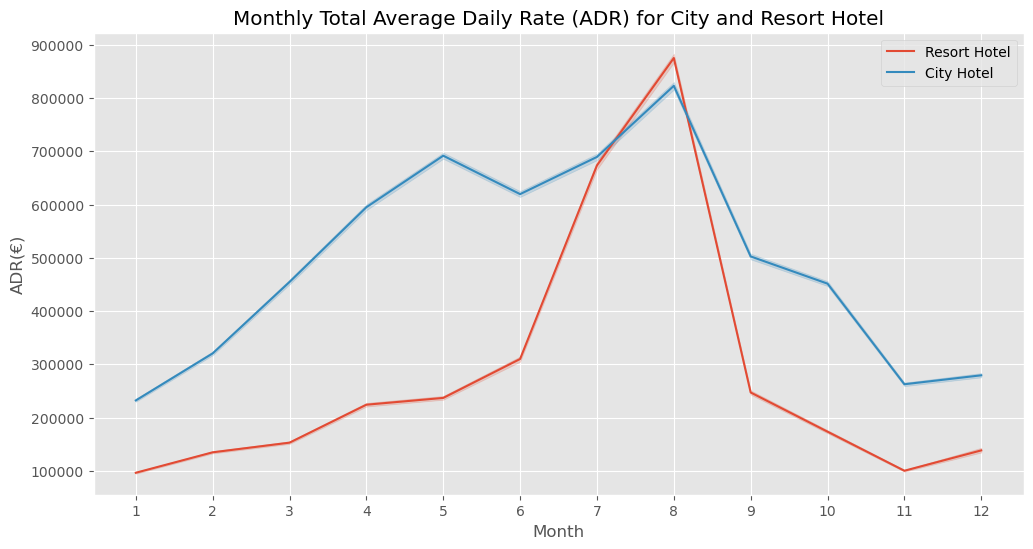

In [45]:
# 2. Comparison of Monthly Total ADR for City and Resort Hotel

plt.figure(figsize=(12, 6))
sns.lineplot(data=hotel_booking, x=hotel_booking["arrival_date"].dt.month, y="adr", hue="hotel",estimator=sum)

# Customize the plot details
plt.title("Monthly Total Average Daily Rate (ADR) for City and Resort Hotel")
plt.xlabel("Month")
plt.ylabel("ADR(€)")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);

'''
Seems like people prefer staying at Resort Hotel in July and August. 
In August, only Resort Hotel's total ADR surpasses that of City Hotel."
''';

'\nIn July and August, these are the only two months when Resort Hotel\'s ADR is higher than that of City Hotel."\n'

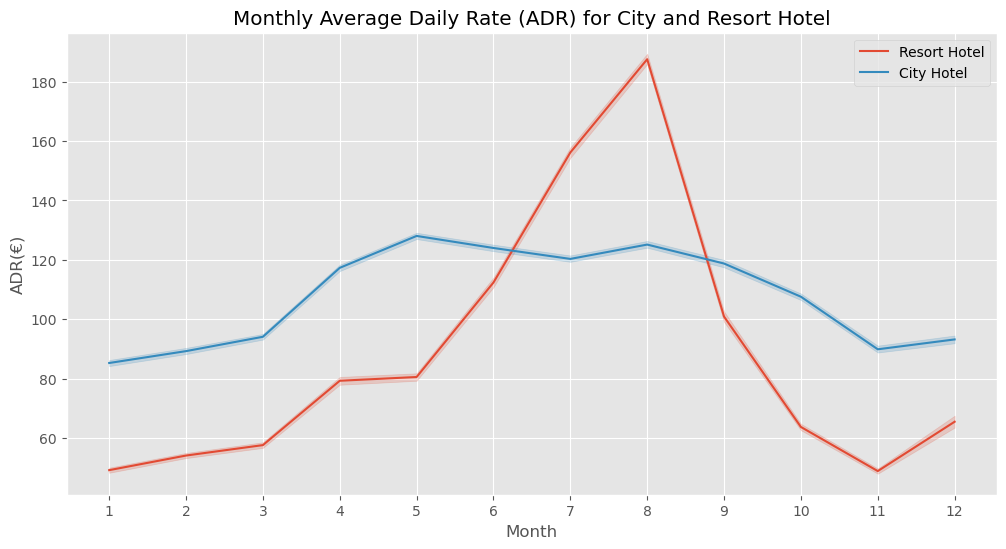

In [46]:
# 3. Comparison of Monthly ADR for City and Resort Hotel
plt.figure(figsize=(12, 6))
sns.lineplot(data=hotel_booking, x=hotel_booking["arrival_date"].dt.month, y="adr", hue="hotel")

# Customize the plot details
plt.title("Monthly Average Daily Rate (ADR) for City and Resort Hotel")
plt.xlabel("Month")
plt.ylabel("ADR(€)")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);

'''
In July and August, these are the only two months when Resort Hotel's ADR is higher than that of City Hotel."
'''

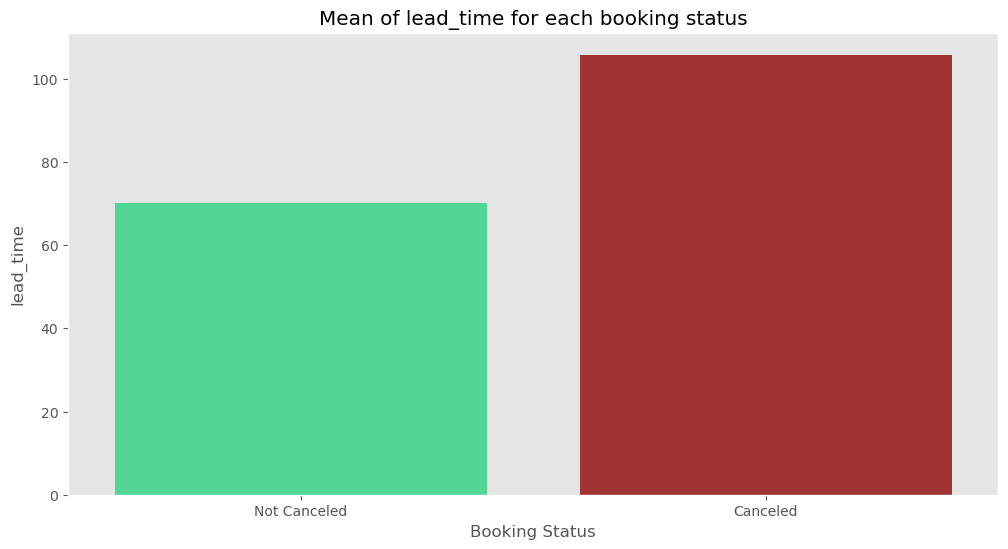

In [47]:
# 4. Comparing The Mean of lead_time for each booking status

plt.figure(figsize=(12, 6))
sns.barplot(data=hotel_booking, 
            x="is_canceled", 
            y="lead_time",
            errorbar=None,
            palette=["#3CEC97","#b22222"])

plt.title("Mean of lead_time for each booking status")
plt.xlabel("Booking Status")
plt.grid(False)
plt.xticks([0,1], labels=["Not Canceled", "Canceled"]);

'''
The not-canceled group has a lead time less than the canceled group.
''';

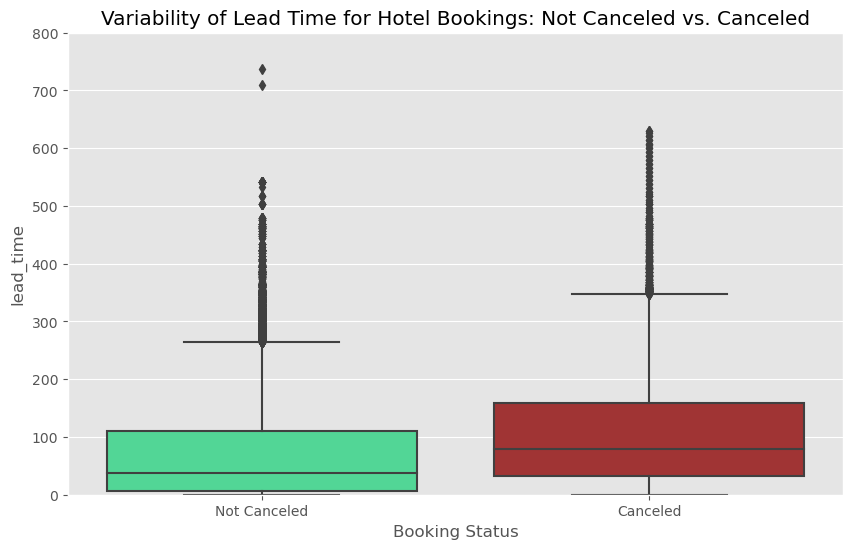

In [48]:
# 5. Let's explore the variability of lead time for hotel bookings, categorized by booking status
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel_booking, x='is_canceled', y='lead_time',palette=["#3CEC97","#b22222"])

# Customize the plot details
plt.xticks([0,1], labels=["Not Canceled", "Canceled"])
plt.title("Variability of Lead Time for Hotel Bookings: Not Canceled vs. Canceled")
plt.xlabel("Booking Status")
plt.ylim(0,800)
plt.show()

'''
The non-canceled group has a lower median lead_time compared to the canceled group (38 < 80).
''';

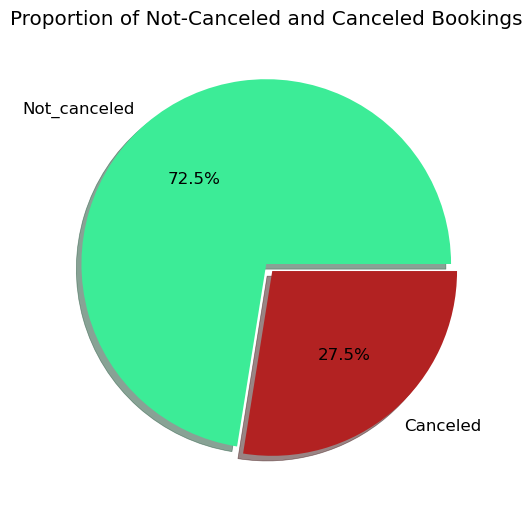

In [49]:
# 6. Proportion of Not-Canceled and Canceled Bookings
plt.figure(figsize=(10, 6))
hotel_booking["is_canceled"].value_counts(sort=False).plot(
    kind="pie", 
    title="Proportion of Not-Canceled and Canceled Bookings",
    autopct = '%1.1f%%',
    fontsize=12,
    labels=["Not_canceled","Canceled"],
    colors=["#3CEC97","#b22222"],
    shadow=True,
    explode=[0,0.05])

# Customize the plot details
plt.ylabel(None)

'''
Perhaps we should establish a KPI to reduce the percentage of cancellations to 25%.
''';

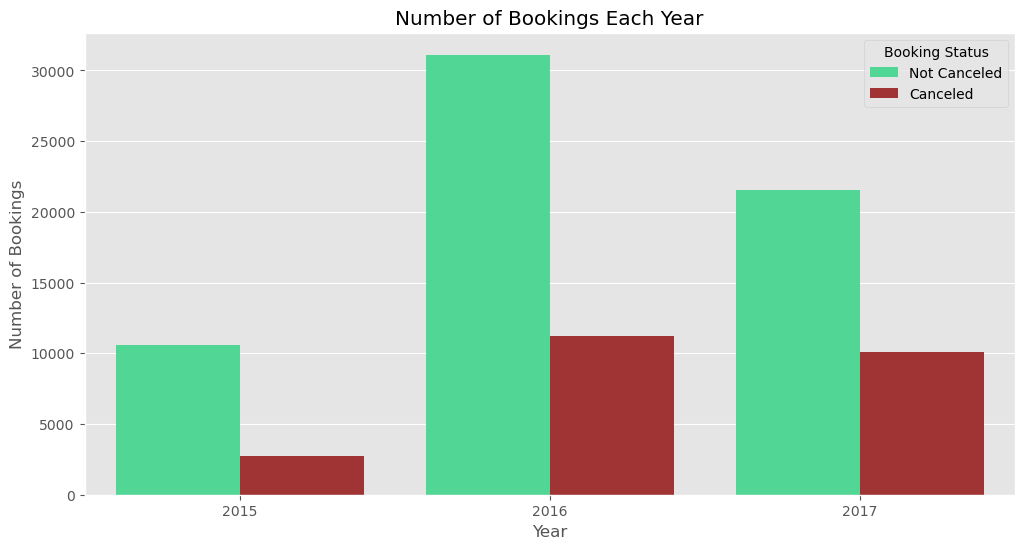

In [50]:
# 7. Number of Bookings for Non-Cancellations and Cancellations Each Year

# plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_year', 
              hue='is_canceled', 
              data=hotel_booking,
              palette=["#3CEC97","#b22222"])

# Customize the plot details
plt.title('Number of Bookings Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled']);


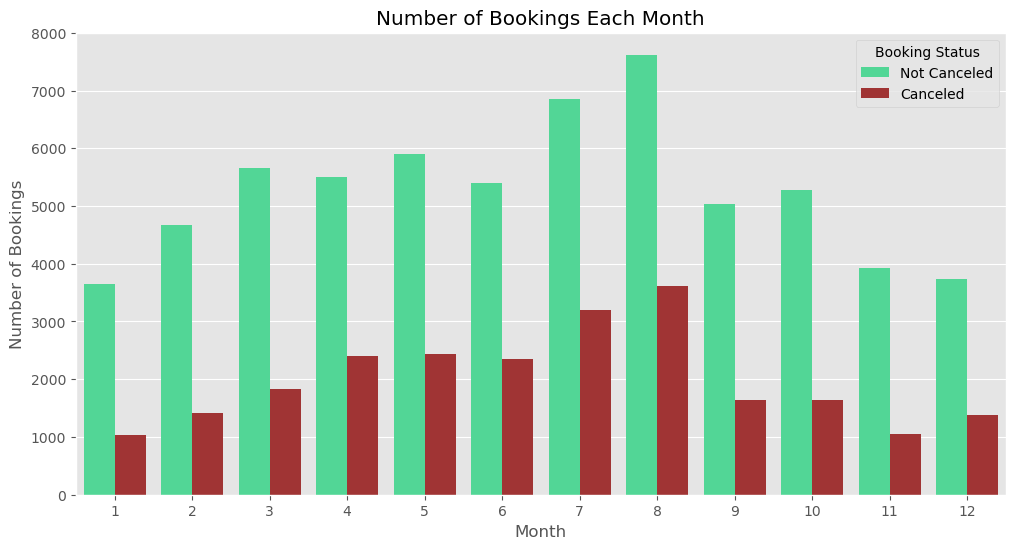

In [51]:
# 8. Number of Bookings for Non-Cancellations and Cancellations Each Month

# plotting
plt.figure(figsize=(12, 6))
sns.countplot(x=hotel_booking["arrival_date"].dt.month, 
              hue='is_canceled', 
              data=hotel_booking,
              palette=["#3CEC97","#b22222"])

# Customize the plot details
plt.title('Number of Bookings Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled']);

'''
The number of cancellation starts to grow every month and peaks in July and August, 
then likely drops in September to December
''';

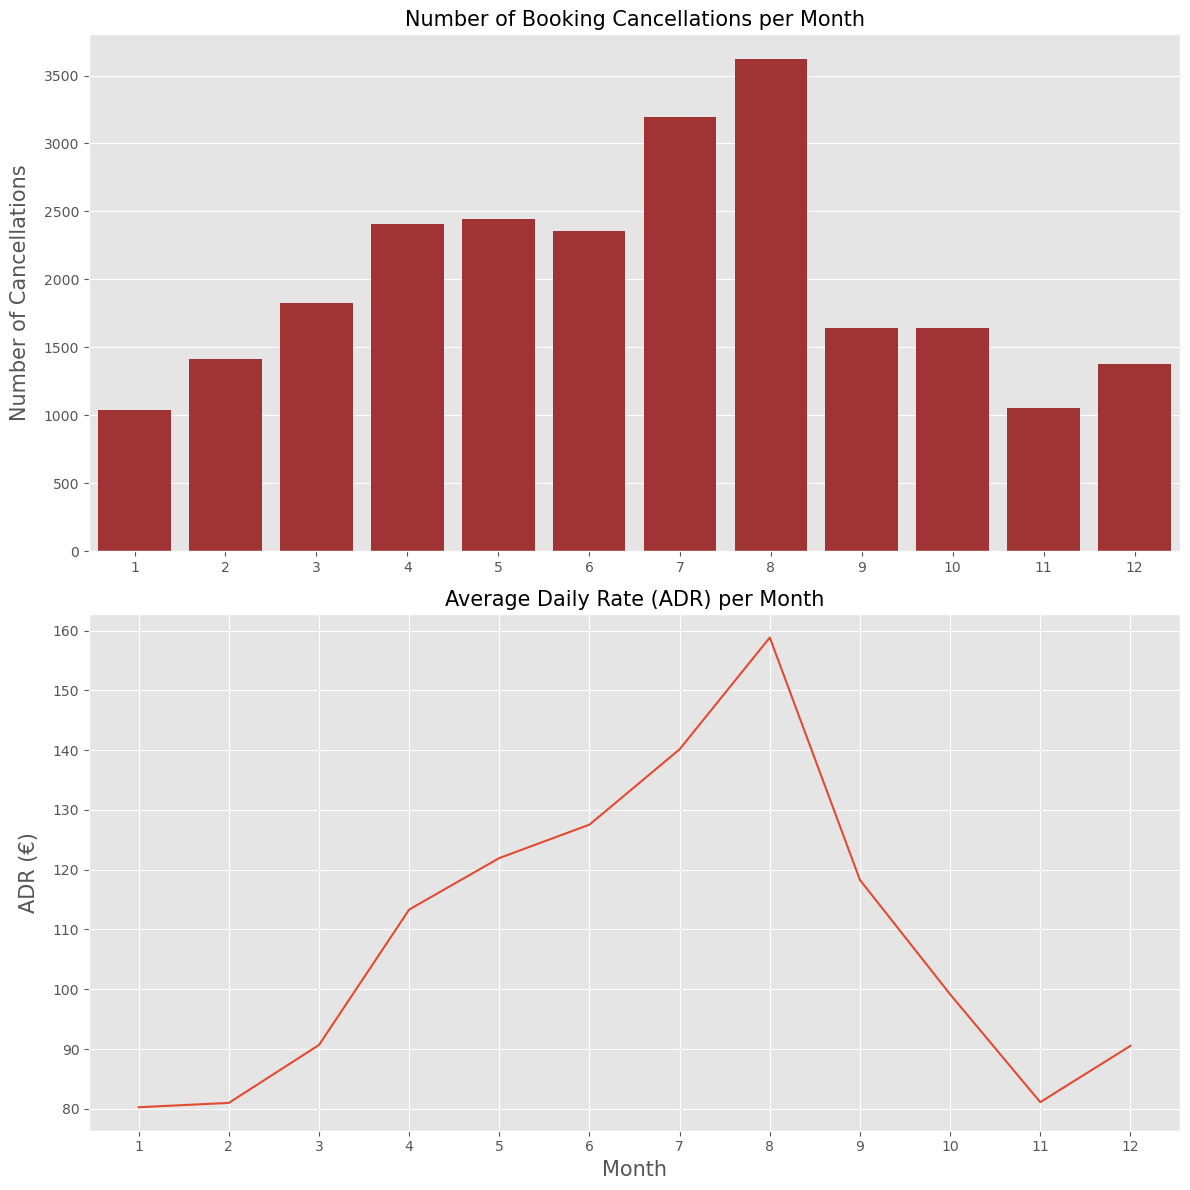

In [52]:
# 9. Let's check for the trend between the number of cancellation and ADR.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Graph 1: Number of Hotel Booking Cancellations per Month
sns.countplot(x=hotel_canceled["arrival_date"].dt.month, 
              data=hotel_canceled, 
              color="#b22222", 
              ax=ax1)
ax1.set_title('Number of Booking Cancellations per Month',size=15)
ax1.set_xlabel(None)
ax1.set_ylabel('Number of Cancellations', labelpad=10,size=15)

# Graph 2: Average Daily Rate (ADR) per Month
sns.lineplot(x=hotel_canceled["arrival_date"].dt.month, 
             y="adr", 
             data=hotel_canceled, 
             errorbar=None, 
             ax=ax2)
ax2.set_title('Average Daily Rate (ADR) per Month',size=15)
ax2.set_xlabel('Month',size=15)
ax2.set_ylabel('ADR (€)', labelpad=10,size=15)
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


plt.tight_layout()

'''
The Number of cancellations and ADR are very high in July and August
''';

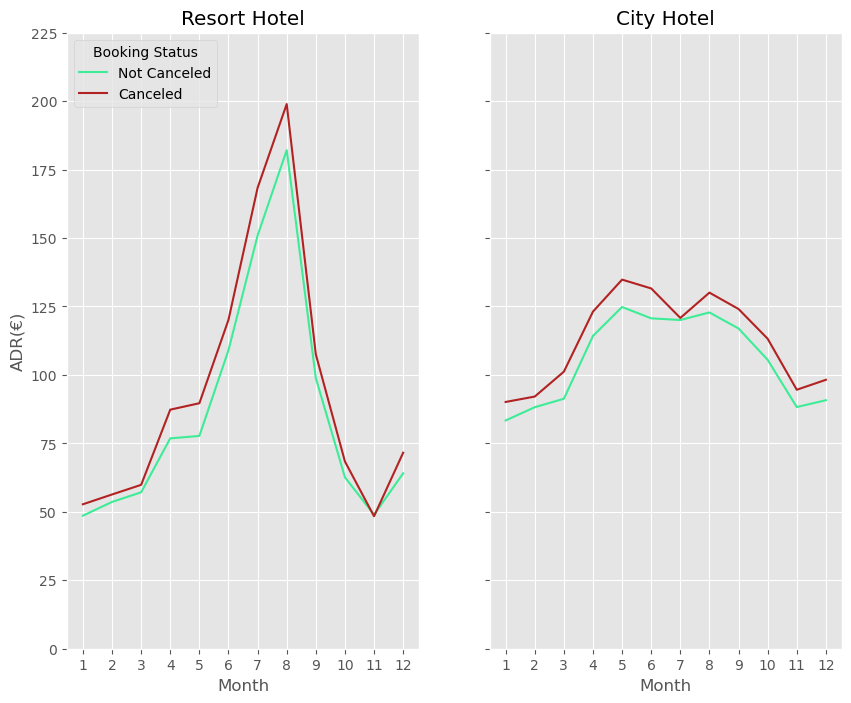

In [53]:
# 10. Let's break down the booking status for hotel types('Resort' and 'City') in terms of ADR per month.

# Data preparation
Resort = hotel_booking.loc[hotel_booking["hotel"] == "Resort Hotel",]
City = hotel_booking.loc[hotel_booking["hotel"] == "City Hotel",]


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8),sharex=True,sharey=True)
# Resort hotel
sns.lineplot(data=Resort,
             x=Resort["arrival_date"].dt.month, 
             y="adr",  
             hue="is_canceled",
             ax=ax1,
             errorbar=None,
             palette=["#3CEC97","#b22222"])
ax1.set_title("Resort Hotel")
ax1.set_xlabel("Month")
ax1.set_ylabel("ADR(€)")
ax1.set_ylim(0,225)
ax1.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])

# City hotel
sns.lineplot(data=City,
             x=City["arrival_date"].dt.month, 
             y="adr",  
             hue="is_canceled",
             ax=ax2,
             errorbar=None,
             palette=["#3CEC97","#b22222"],
             legend=False)
ax2.set_title("City Hotel")
ax2.set_xlabel("Month")
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

'''
For the month that has a very high in cancellations(July), 
the difference in ADR gap for the City Hotel is very small. 
Let's continue checking.
''';

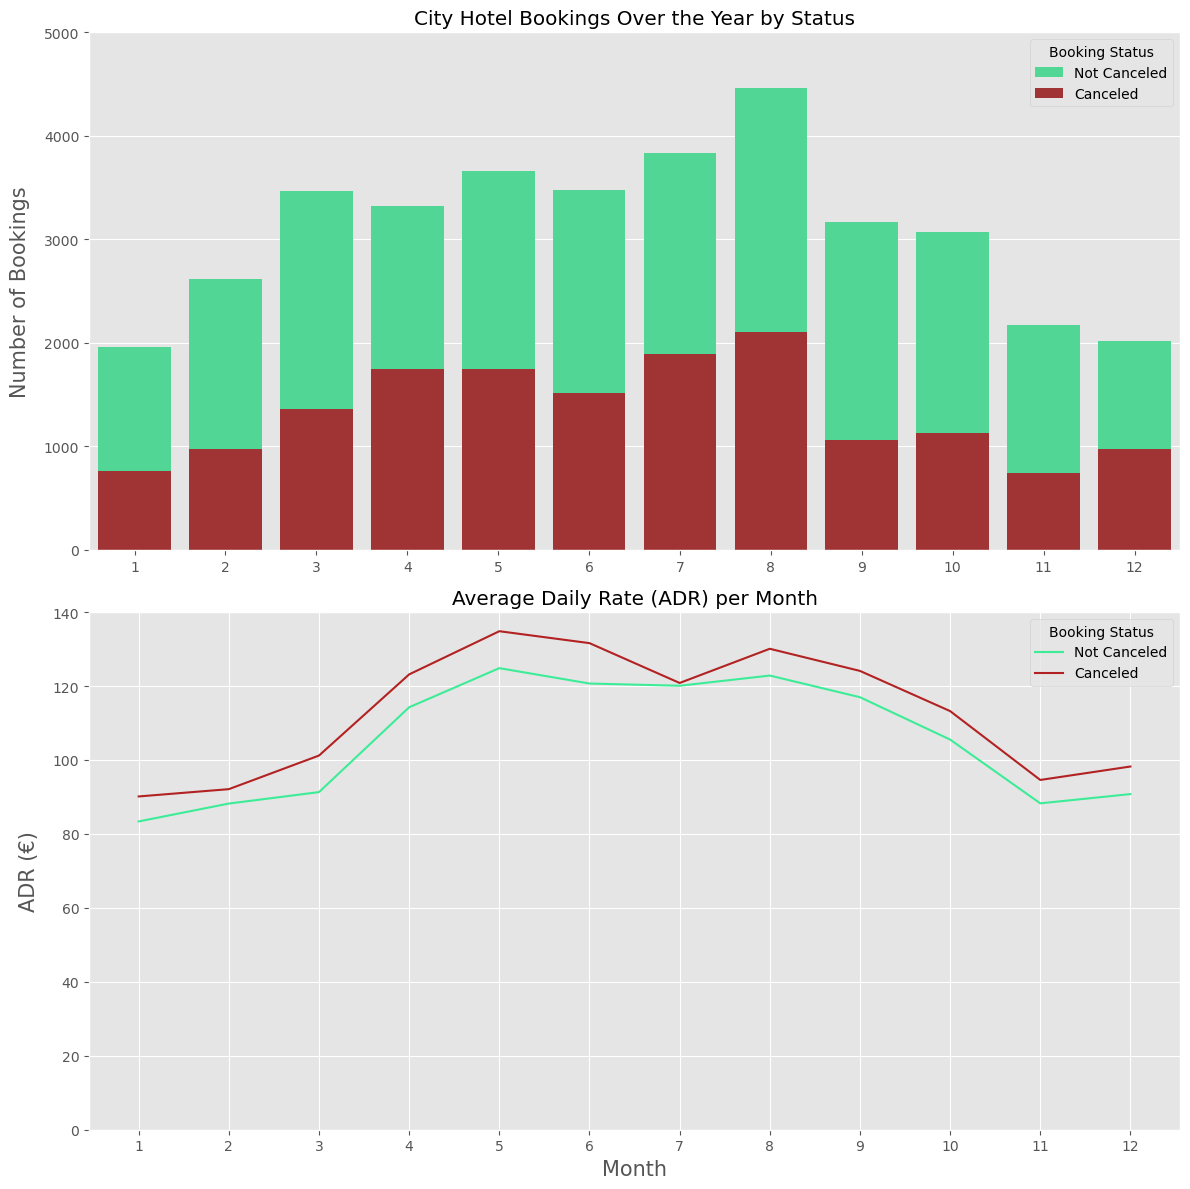

In [54]:
# Continue Checking what happened with City Hotel

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Graph 1: City Hotel Bookings Over the Year by Status.
sns.countplot(x=City["arrival_date"].dt.month, hue="is_canceled", data=City, ax=ax1, dodge=False,palette=["#3CEC97","#b22222"])
ax1.set_title('City Hotel Bookings Over the Year by Status')
ax1.set_xlabel(None)
ax1.set_ylabel('Number of Bookings', labelpad=10,size=15)
ax1.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
ax1.set_ylim(0,5000)

# Graph 2: Average Daily Rate (ADR) per Month
sns.lineplot(x=City["arrival_date"].dt.month, y="adr",hue="is_canceled", data=City, errorbar=None, ax=ax2,palette=["#3CEC97","#b22222"])
ax2.set_title('Average Daily Rate (ADR) per Month')
ax2.set_xlabel('Month',size=15)
ax2.set_ylabel('ADR (€)', labelpad=10,size=15)
ax2.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax2.set_ylim(0,140)


plt.tight_layout()
plt.show()

'''
For the City Hotel in July, despite a very small difference in ADR between booking statuses, 
the number of cancellation remains high.
''';

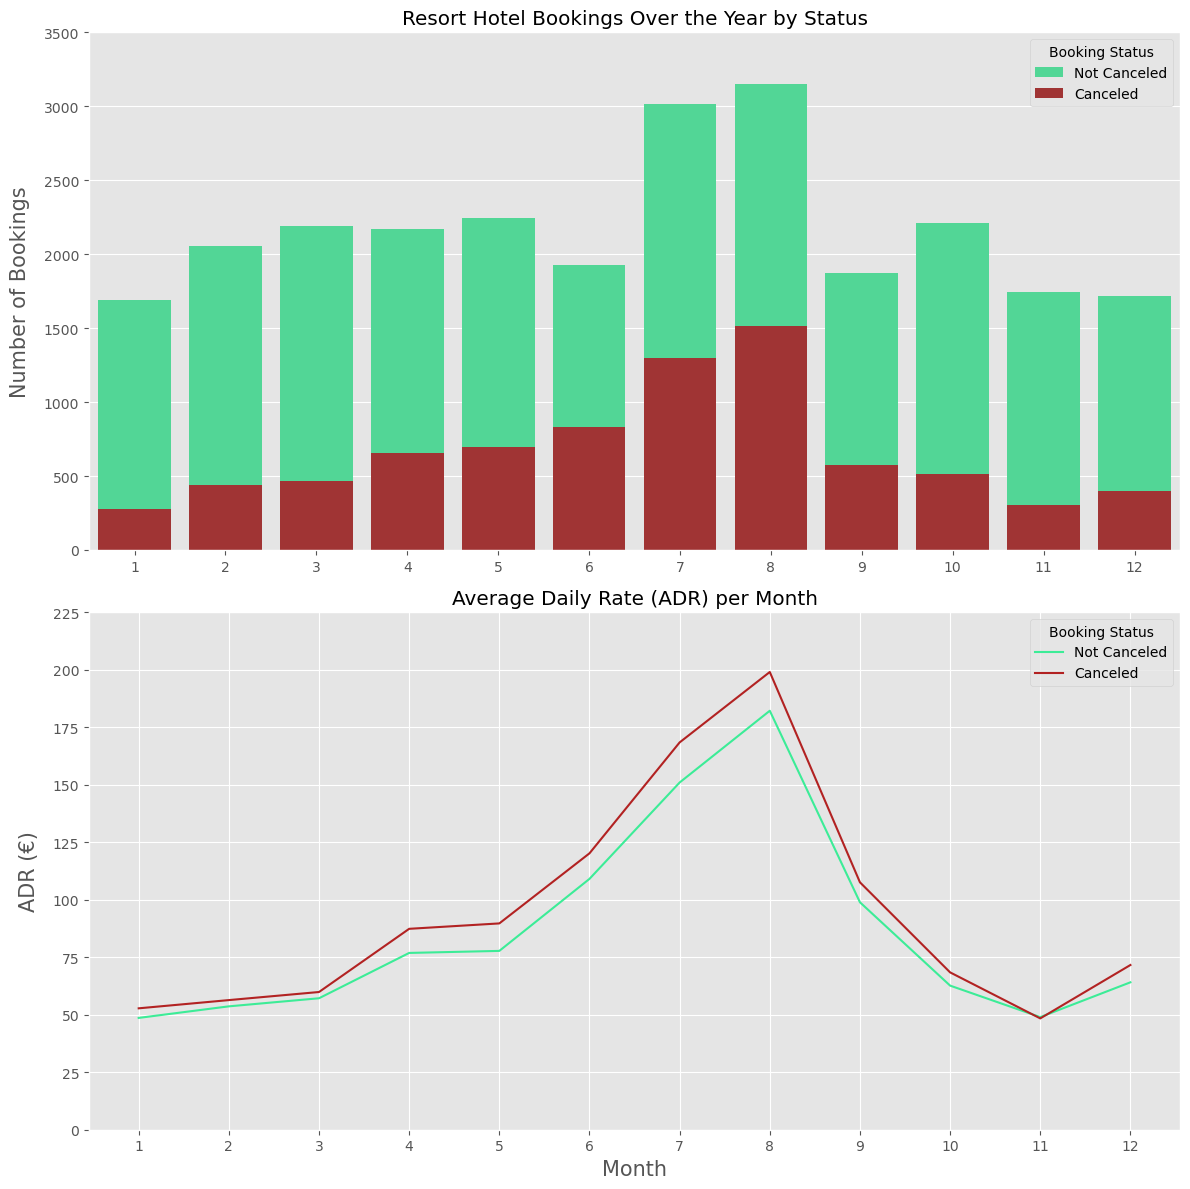

In [55]:
# 11. Resort Hotel

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Graph 1: Number of Hotel Booking Cancellations per Month for City Hotel.
sns.countplot(x=Resort["arrival_date"].dt.month, hue="is_canceled", data=Resort, ax=ax1, dodge=False,palette=["#3CEC97","#b22222"])
ax1.set_title('Resort Hotel Bookings Over the Year by Status')
ax1.set_xlabel(None)
ax1.set_ylabel('Number of Bookings', labelpad=10,size=15)
ax1.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
ax1.set_ylim(0,3500)

# Graph 2: Average Daily Rate (ADR) per Month
sns.lineplot(x=Resort["arrival_date"].dt.month, y="adr",hue="is_canceled", data=Resort, errorbar=None, ax=ax2,palette=["#3CEC97","#b22222"])
ax2.set_title('Average Daily Rate (ADR) per Month')
ax2.set_xlabel('Month',size=15)
ax2.set_ylabel('ADR (€)', labelpad=10,size=15)
ax2.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax2.set_ylim(0,225)


plt.tight_layout()
plt.show()

'''
In the case of the Resort Hotel, when the number of cancellations is high, 
the Average Daily Rate (ADR) also tends to be high
''';

In [56]:
# 12. There are 165 countries in this data set
hotel_no_canceled["country"].nunique()

165

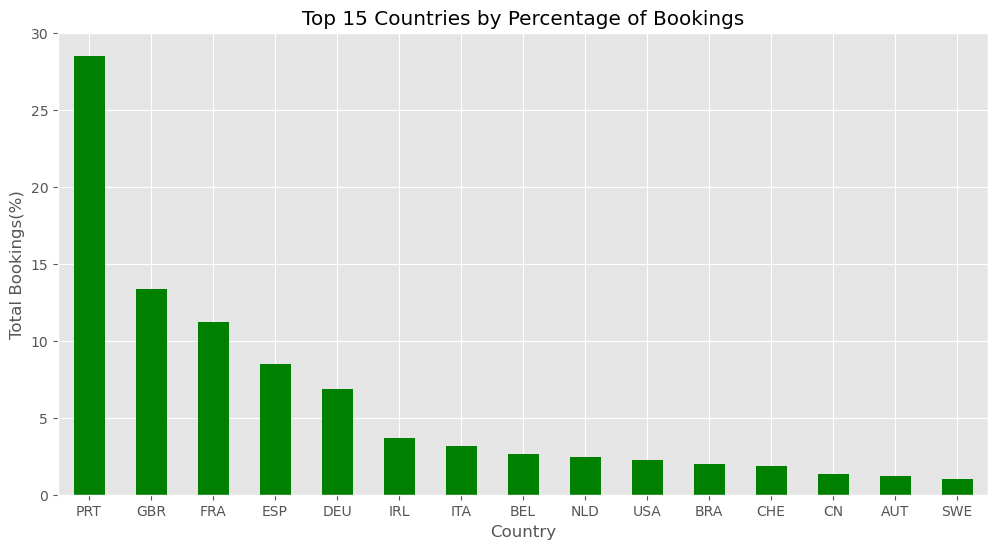

In [57]:
# 13. Determining the country of the guests

# data preparation
hotel_no_canceled["country"].value_counts(normalize=True).head(15).sum()
country_booking_counts = hotel_no_canceled["country"].value_counts(normalize=True).head(15)*100


# plotting
plt.figure(figsize=(12,6))
country_booking_counts.plot(kind="bar", color="green")

# Customize the plot details
plt.title("Top 15 Countries by Percentage of Bookings")
plt.xlabel("Country")
plt.ylabel("Total Bookings(%)")
plt.xticks(rotation=0)
plt.ylim(0, 30)

'''
These 15 countries are countries that we should keep an eye on.
''';

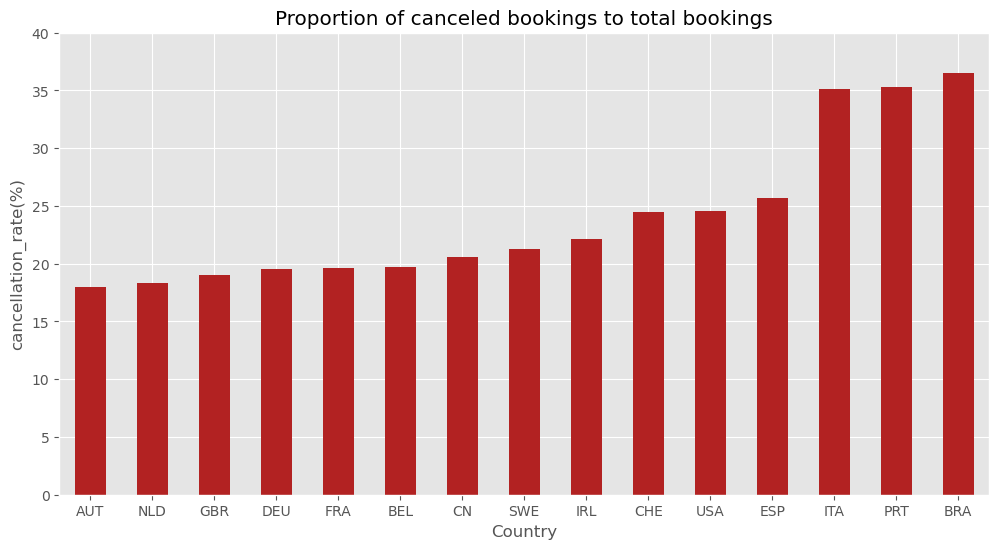

In [58]:
# 14. From the top 15 countries by the percentage of bookings, which country has the highest proportion of canceled bookings per total bookings?

# data preparation
sample = hotel_no_canceled["country"].value_counts().head(15) / hotel_booking["country"].value_counts()
sample.dropna(inplace=True)
cancellation_rate = (1 - sample)*100

# plotting
plt.figure(figsize=(12,6))
cancellation_rate.sort_values().plot(kind="bar", color="#b22222")

# Customize the plot details
plt.title("Proportion of canceled bookings to total bookings")
plt.xlabel("Country")
plt.ylabel("cancellation_rate(%)")
plt.xticks(rotation=0)
plt.ylim(0,40)

'''
BRA, PRT, and ITA are the top three countries with the highest proportion of canceled bookings per total bookings
''';

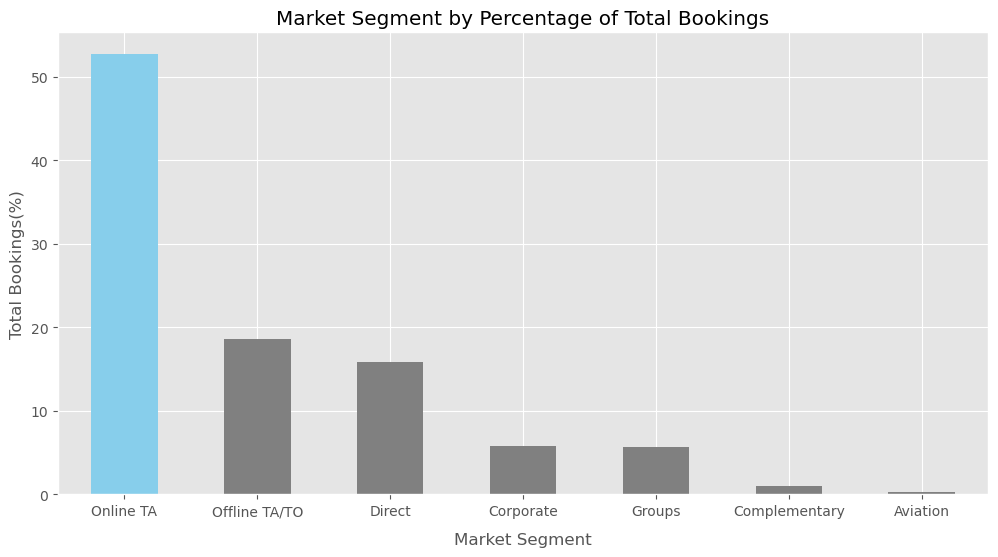

In [59]:
# 15. Total Bookings(%) by market segment

# Data prepartion
col=["skyblue","grey","grey","grey","grey","grey","grey"]

# Bar Chart
plt.figure(figsize=(12, 6))
market_segment_counts = hotel_no_canceled["market_segment"].value_counts(normalize=True)*100
market_segment_counts.plot(kind="bar", color=col)

plt.title("Market Segment by Percentage of Total Bookings")
plt.xlabel("Market Segment", labelpad=10)
plt.ylabel("Total Bookings(%)")
plt.xticks(rotation=0);

'''
Looks like the Online TA is a favorite market segment, accounting for 50% of the total bookings.
''';

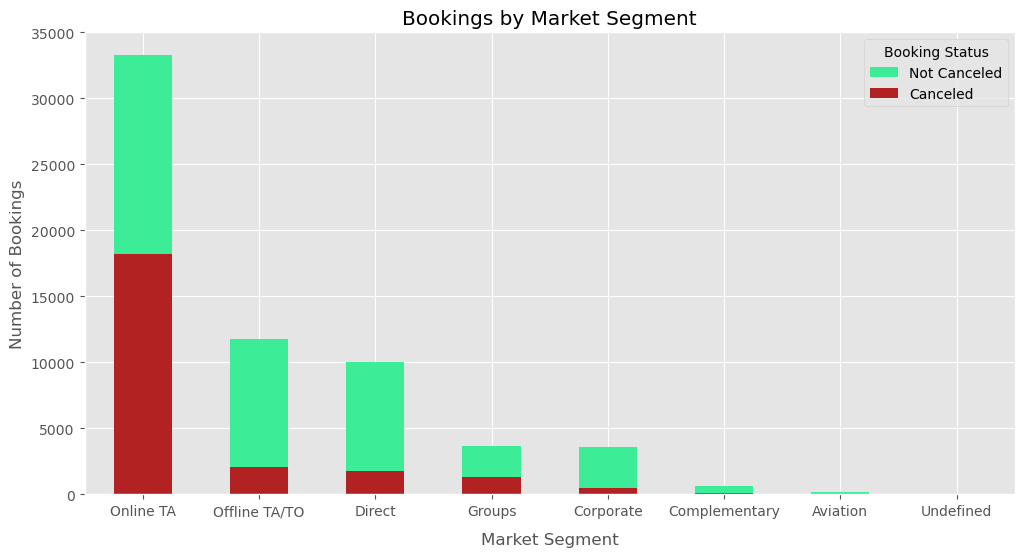

In [60]:
# 16. Comparison of the number of bookings for not-canceled and canceled by market segment.


# Data preparation
market_segment_counts_not_canceled = hotel_no_canceled["market_segment"].value_counts()
market_segment_counts_canceled = hotel_canceled["market_segment"].value_counts()

# Bar Chart
plt.figure(figsize=(12, 6))
market_segment_counts_not_canceled.plot(kind="bar", color="#3CEC97")
market_segment_counts_canceled.plot(kind="bar", color="#b22222")

plt.title("Bookings by Market Segment")
plt.xlabel("Market Segment", labelpad=10)
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.ylim(0,35000)
plt.legend(title="Booking Status",labels=["Not Canceled","Canceled"])

'''
Looks like Online TA has a problem ,
because the number of canceled bookings is half of the number of not canceled bookings.
''';

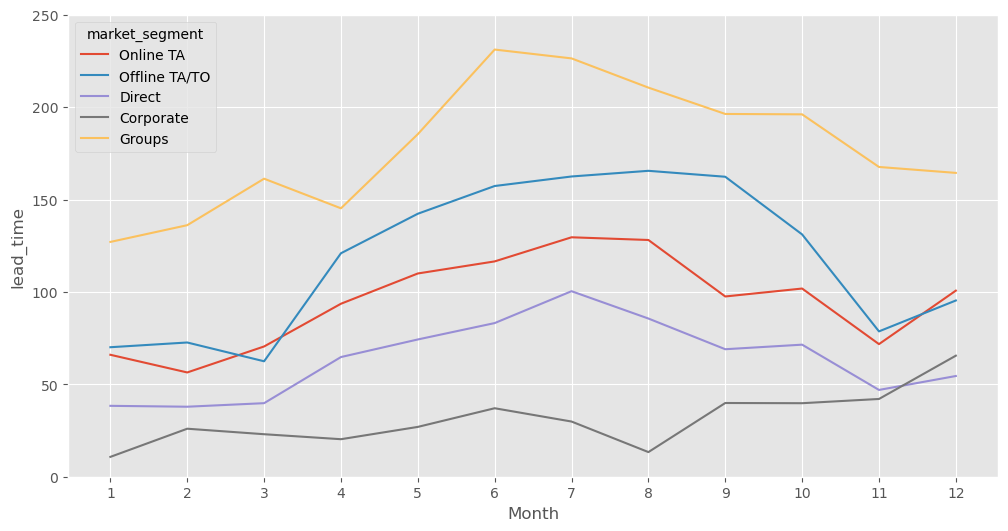

In [61]:
# 17. Determine the average lead time of cancellation group for each market segment

# Data preparation
name = ["Complementary","Aviation","Undefined"]
top5_market_seg = hotel_canceled[~hotel_canceled["market_segment"].isin(name)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top5_market_seg,x=hotel_canceled["arrival_date"].dt.month,y="lead_time",hue="market_segment",errorbar=None)
plt.xlabel("Month")
plt.ylim(0,250)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);

'''
For the cancellation group, "Groups" is a market segment that has a significantly higher lead time compared to other segments.
''';